In [25]:
import tweepy          
import pandas as pd
import numpy as np

from textblob import TextBlob
import re


from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# Consume:
CONSUMER_KEY    = "KhtiptQ5gtUfx0V5DCnMCeXYI"
CONSUMER_SECRET = "Em9afXhUezobaiZp2WWsGgCpyxiDSCgvrrap3yuDB8jiF3g9LQ"

# Access:
ACCESS_TOKEN  = "2851590678-AQWVYMvV4MGZBK15e4soQvfOR25s4cW1LL2Uuj0"
ACCESS_SECRET = "36dPZh8EHIVuCzaprbBYaDQUruYFr4fEHKIxtrDnPttgL"

In [27]:
def twitter_setup():
    # Will  return an authenticated api
    
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [28]:
extractor = twitter_setup()


tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))


print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

https://t.co/tJG3KIn2q0

Our Great Larry Kudlow, who has been working so hard on trade and the economy, has just suffered a heart attack. He… https://t.co/P4sfstikaa

Just won big Supreme Court decision on Voting! Great News!

The fact that I am having a meeting is a major loss for the U.S., say the haters &amp; losers. We have our hostages, te… https://t.co/9bI2JtzCMx

Stock Market up almost 40% since the Election, with 7 Trillion Dollars of U.S. value built throughout the economy.… https://t.co/MtbGybefkO



In [29]:

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])


display(data.head(10))


,Tweets
0,https://t.co/tJG3KIn2q0
1,"Our Great Larry Kudlow, who has been working s..."
2,Just won big Supreme Court decision on Voting!...
3,The fact that I am having a meeting is a major...
4,"Stock Market up almost 40% since the Election,..."
5,Meetings between staffs and representatives ar...
6,Thank you Prime Minister Lee Hsien Loong! http...
7,"Sorry, we cannot let our friends, or enemies, ..."
8,"Great to be in Singapore, excitement in the air!"
9,....Germany pays 1% (slowly) of GDP towards NA...


In [30]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [31]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
#data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [32]:
display(data.head(10))

,Tweets,len,ID,Date,Likes,RTs
0,https://t.co/tJG3KIn2q0,23,1006446738016755712,2018-06-12 08:02:55,110529,32543
1,"Our Great Larry Kudlow, who has been working s...",140,1006334219759575040,2018-06-12 00:35:49,85385,23051
2,Just won big Supreme Court decision on Voting!...,58,1006326057375584261,2018-06-12 00:03:23,95346,19524
3,The fact that I am having a meeting is a major...,144,1006296018210603008,2018-06-11 22:04:01,127363,30274
4,"Stock Market up almost 40% since the Election,...",139,1006293144911085568,2018-06-11 21:52:36,118390,28259
5,Meetings between staffs and representatives ar...,140,1006286790536323074,2018-06-11 21:27:21,91501,19359
6,Thank you Prime Minister Lee Hsien Loong! http...,65,1006081372912484353,2018-06-11 07:51:06,80904,18171
7,"Sorry, we cannot let our friends, or enemies, ...",123,1006003345360908295,2018-06-11 02:41:02,145676,32105
8,"Great to be in Singapore, excitement in the air!",48,1005989290520739845,2018-06-11 01:45:11,107700,20922
9,....Germany pays 1% (slowly) of GDP towards NA...,140,1005988633747312640,2018-06-11 01:42:35,132168,32211


In [33]:

mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 124.525


In [35]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Bob Iger of ABC called Valerie Jarrett to let her know that “ABC does not tolerate comments like those” made by Ros… https://t.co/6mbr4M5sW2
Number of likes: 164388
140 characters.

The tweet with more retweets is: 
Bob Iger of ABC called Valerie Jarrett to let her know that “ABC does not tolerate comments like those” made by Ros… https://t.co/6mbr4M5sW2
Number of retweets: 45488
140 characters.



In [36]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

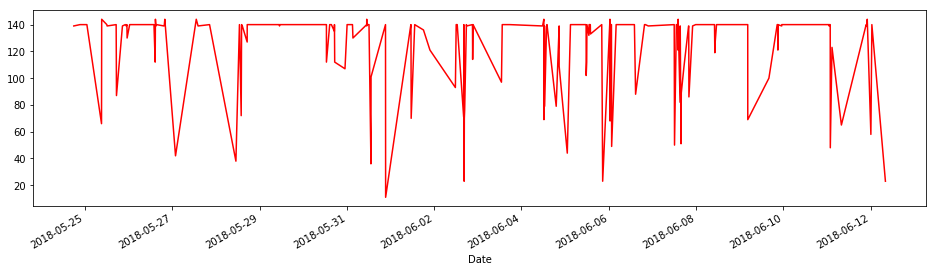

In [37]:
tlen.plot(figsize=(16,4), color='r');

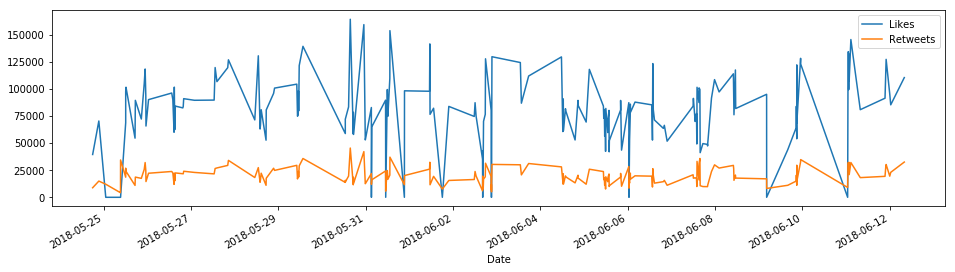

In [38]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [39]:
"""
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)


print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))
"""

'\nsources = []\nfor source in data[\'Source\']:\n    if source not in sources:\n        sources.append(source)\n\n\nprint("Creation of content sources:")\nfor source in sources:\n    print("* {}".format(source))\n'

In [40]:
# We create a numpy vector mapped to labels:
"""
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100


pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));
"""

"\npercent = np.zeros(len(sources))\n\nfor source in data['Source']:\n    for index in range(len(sources)):\n        if source == sources[index]:\n            percent[index] += 1\n            pass\n\npercent /= 100\n\n\npie_chart = pd.Series(percent, index=sources, name='Sources')\npie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));\n"

In [41]:

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [42]:
# Column >> result
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

#display head again
display(data.head(10))


,Tweets,len,ID,Date,Likes,RTs,SA
0,https://t.co/tJG3KIn2q0,23,1006446738016755712,2018-06-12 08:02:55,110529,32543,0
1,"Our Great Larry Kudlow, who has been working s...",140,1006334219759575040,2018-06-12 00:35:49,85385,23051,1
2,Just won big Supreme Court decision on Voting!...,58,1006326057375584261,2018-06-12 00:03:23,95346,19524,1
3,The fact that I am having a meeting is a major...,144,1006296018210603008,2018-06-11 22:04:01,127363,30274,-1
4,"Stock Market up almost 40% since the Election,...",139,1006293144911085568,2018-06-11 21:52:36,118390,28259,0
5,Meetings between staffs and representatives ar...,140,1006286790536323074,2018-06-11 21:27:21,91501,19359,1
6,Thank you Prime Minister Lee Hsien Loong! http...,65,1006081372912484353,2018-06-11 07:51:06,80904,18171,0
7,"Sorry, we cannot let our friends, or enemies, ...",123,1006003345360908295,2018-06-11 02:41:02,145676,32105,-1
8,"Great to be in Singapore, excitement in the air!",48,1005989290520739845,2018-06-11 01:45:11,107700,20922,1
9,....Germany pays 1% (slowly) of GDP towards NA...,140,1005988633747312640,2018-06-11 01:42:35,132168,32211,-1


In [43]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [44]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 48.5%
Percentage of neutral tweets: 30.5%
Percentage de negative tweets: 21.0%
